<a href="https://colab.research.google.com/github/MariamAshraf1/DM-MiniProjects/blob/main/Mini_Project_2(Mariam%26Farida-Conclusion).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Mini-Project 2 - Clustering**

***Edit this cell with your name(s), tutorial number(s) and ID(s)***

---

Name: Mariam Ashraf Hamed

ID: 43-3292

Tutorial: T01

---

Name: Farida Hossam El-Habrouk

ID: 43-3965

Tutorial: T01

---

# **Dataset Description**

The dataset file contains almost ~3000 different music genres aggregated from more than 170.000 songs collected from Spotify Web API.

Primary:

- genre (Music genre)

Numerical:

- acousticness (Ranges from 0 to 1)
- danceability (Ranges from 0 to 1)
- energy (Ranges from 0 to 1)
- duration_ms (Integer typically ranging from 200k to 300k)
- instrumentalness (Ranges from 0 to 1)
- valence (Ranges from 0 to 1)
- popularity (Ranges from 0 to 100)
- tempo (Float typically ranging from 50 to 150)
- liveness (Ranges from 0 to 1)
- loudness (Float typically ranging from -60 to 0 in decibels (dB))
- speechiness (Ranges from 0 to 1)
- year (Ranges from 1921 to 2020)

Binary:

- mode (0 = Minor, 1 = Major; representing whether the track starts with a major (1) chord progression or not (0))
- explicit (0 = No explicit content, 1 = Explicit content)

Categorical:

- key (All keys on octave encoded as values ranging from 0 to 11, starting on C as 0, C# as 1 and so on…)

Recommended Reading for Data Understanding: Spotify's documentation of audio features: https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/

##**Importing libraries and Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('fivethirtyeight')
sns.set_style('whitegrid')

In [2]:
try:
    df = pd.read_csv('../data/music_genres.csv')
except:
    df = pd.read_csv('https://raw.githubusercontent.com/GUC-DM/W2020/main/data/music_genres.csv')
df.head(10)

mode                  genres  acousticness  ...   valence  popularity  key
0     1  21st century classical      0.979333  ...  0.103783   27.833333    6
1     1                   432hz      0.494780  ...  0.221750   52.500000    5
2     1                   8-bit      0.762000  ...  0.975000   48.000000    7
3     1                      []      0.651417  ...  0.513604   20.859882    7
4     1              a cappella      0.676557  ...  0.448249   45.820071    7
5     1                abstract      0.459210  ...  0.307325   43.500000    1
6     1          abstract beats      0.342147  ...  0.493507   58.933333   10
7     1        abstract hip hop      0.243854  ...  0.571391   39.790702    2
8     0               accordeon      0.323000  ...  0.709000   39.000000    2
9     1               accordion      0.446125  ...  0.658688   21.937500    2

[10 rows x 14 columns]

In [3]:
pd.set_option('display.max_columns', 15)
pd.set_option('display.max_rows',2973)
df

mode                             genres  acousticness  danceability  \
0        1             21st century classical      0.979333      0.162883   
1        1                              432hz      0.494780      0.299333   
2        1                              8-bit      0.762000      0.712000   
3        1                                 []      0.651417      0.529093   
4        1                         a cappella      0.676557      0.538961   
5        1                           abstract      0.459210      0.516167   
6        1                     abstract beats      0.342147      0.623000   
7        1                   abstract hip hop      0.243854      0.694571   
8        0                          accordeon      0.323000      0.588000   
9        1                          accordion      0.446125      0.624812   
10       0                         acid house      0.067951      0.677400   
11       1                          acid rock      0.256915      0.447239   
12       1                        acid trance      0.006830      0.663000   
13       1                         acousmatic      0.917019      0.420458   
14       1                     acoustic blues      0.761724      0.606915   
15       1                       acoustic pop      0.490235      0.535108   
16       1                      acoustic punk      0.404900      0.539112   
17       1                      acoustic rock      0.613201      0.524397   
18       0                        action rock      0.229000      0.412000   
19       1                          adoracion      0.432857      0.504714   
20       1                    adult standards      0.655648      0.496328   
21       1                         adventista      0.784143      0.531500   
22       1                         afghan pop      0.410629      0.651714   
23       1                 afghan traditional      0.958000      0.440333   
24       0                 african percussion      0.327000      0.600364   
25       1                     african reggae      0.245800      0.753000   
26       1                       african rock      0.139857      0.668896   
27       1         african-american classical      0.925534      0.283976   
28       0                     afro dancehall      0.143900      0.643458   
29       1                         afro house      0.321667      0.636000   
30       1                         afro psych      0.228067      0.624333   
31       0                          afro soul      0.006270      0.766000   
32       1                          afro-funk      0.137559      0.803148   
33       1                           afrobeat      0.360872      0.632961   
34       1                       afrofuturism      0.248163      0.633519   
35       0           afrofuturismo brasileiro      0.626000      0.484000   
36       1                            afropop      0.436660      0.625803   
37       0                          afroswing      0.318450      0.711750   
38       1                          aggrotech      0.011868      0.601333   
39       1                      alabama indie      0.323278      0.557375   
40       1                      alabama metal      0.002748      0.406500   
41       1                        alabama rap      0.140773      0.686115   
42       1                       alaska indie      0.133867      0.739667   
43       0                       albanian pop      0.002870      0.683000   
44       1                    albany ny indie      0.000564      0.852000   
45       1                    alberta country      0.207767      0.593992   
46       0                    alberta hip hop      0.330000      0.885000   
47       1                         album rock      0.186182      0.512031   
48       1                  albuquerque indie      0.350215      0.562102   
49       1                           alt-idol      0.000305      0.466250   
50       1                               alte      0.069200      0.797000   
51

In [4]:
print(df.columns)

Index(['mode', 'genres', 'acousticness', 'danceability', 'duration_ms',
       'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness',
       'tempo', 'valence', 'popularity', 'key'],
      dtype='object')


In [5]:
df.dtypes

mode                  int64
genres               object
acousticness        float64
danceability        float64
duration_ms         float64
energy              float64
instrumentalness    float64
liveness            float64
loudness            float64
speechiness         float64
tempo               float64
valence             float64
popularity          float64
key                   int64
dtype: object

In [6]:
for col in df.select_dtypes(object).columns:
    print(f"{col}: {df[col].unique()}\n")

genres: ['21st century classical' '432hz' '8-bit' ... 'zouk' 'zurich indie'
 'zydeco']



# **Data Inspection and Cleaning**

In [7]:
df.info

<bound method DataFrame.info of       mode                             genres  acousticness  danceability  \
0        1             21st century classical      0.979333      0.162883   
1        1                              432hz      0.494780      0.299333   
2        1                              8-bit      0.762000      0.712000   
3        1                                 []      0.651417      0.529093   
4        1                         a cappella      0.676557      0.538961   
5        1                           abstract      0.459210      0.516167   
6        1                     abstract beats      0.342147      0.623000   
7        1                   abstract hip hop      0.243854      0.694571   
8        0                          accordeon      0.323000      0.588000   
9        1                          accordion      0.446125      0.624812   
10       0                         acid house      0.067951      0.677400   
11       1                          acid roc

In [8]:
#checking for null values
df.isnull().sum()

mode                0
genres              0
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
liveness            0
loudness            0
speechiness         0
tempo               0
valence             0
popularity          0
key                 0
dtype: int64

In [9]:
#double checking for null values
df.isnull().any().any()

False

In [10]:
df.describe(include='all')

mode          genres  acousticness  danceability   duration_ms  \
count   2973.000000            2973   2973.000000   2973.000000  2.973000e+03   
unique          NaN            2973           NaN           NaN           NaN   
top             NaN  symphonic rock           NaN           NaN           NaN   
freq            NaN               1           NaN           NaN           NaN   
mean       0.833165             NaN      0.401241      0.537187  2.517209e+05   
std        0.372891             NaN      0.319760      0.150668  9.465686e+04   
min        0.000000             NaN      0.000003      0.056900  3.094600e+04   
25%        1.000000             NaN      0.119050      0.441202  2.063788e+05   
50%        1.000000             NaN      0.321745      0.546496  2.375453e+05   
75%        1.000000             NaN      0.673991      0.647500  2.772720e+05   
max        1.000000             NaN      0.996000      0.929000  2.382587e+06   

             energy  instrumentalness     liveness     loudness  speechiness  \
count   2973.000000       2973.000000  2973.000000  2973.000000  2973.000000   
unique          NaN               NaN          NaN          NaN          NaN   
top             NaN               NaN          NaN          NaN          NaN   
freq            NaN               NaN          NaN          NaN          NaN   
mean       0.561143          0.211366     0.192800   -10.509848     0.083588   
std        0.234486          0.267329     0.092356     5.369202     0.080483   
min        0.001002          0.000000     0.022200   -41.825000     0.023800   
25%        0.395058          0.004835     0.137687   -12.427656     0.044900   
50%        0.601195          0.080700     0.178764    -9.221817     0.059457   
75%        0.730127          0.343333     0.220856    -6.920125     0.091000   
max        0.994667          0.992000     0.960000     0.060000     0.946219   

              tempo      valence   popularity          key  
count   2973.000000  2973.000000  2973.000000  2973.000000  
unique          NaN          NaN          NaN          NaN  
top             NaN          NaN          NaN          NaN  
freq            NaN          NaN          NaN          NaN  
mean     119.018723     0.492748    39.919185     5.938782  
std       17.469188     0.201820    16.748723     3.368110  
min       47.135722     0.003353     0.000000     0.000000  
25%      109.198143     0.348578    32.491279     3.000000  
50%      119.194167     0.500048    43.056569     7.000000  
75%      127.508750     0.640257    51.138889     9.000000  
max      204.212000     0.980000    80.666667    11.000000

In [11]:
df.iloc[:, [1]]

genres
0                21st century classical
1                                 432hz
2                                 8-bit
3                                    []
4                            a cappella
5                              abstract
6                        abstract beats
7                      abstract hip hop
8                             accordeon
9                             accordion
10                           acid house
11                            acid rock
12                          acid trance
13                           acousmatic
14                       acoustic blues
15                         acoustic pop
16                        acoustic punk
17                        acoustic rock
18                          action rock
19                            adoracion
20                      adult standards
21                           adventista
22                           afghan pop
23                   afghan traditional
24                   african percussion
25                       african reggae
26                         african rock
27           african-american classical
28                       afro dancehall
29                           afro house
30                           afro psych
31                            afro soul
32                            afro-funk
33                             afrobeat
34                         afrofuturism
35             afrofuturismo brasileiro
36                              afropop
37                            afroswing
38                            aggrotech
39                        alabama indie
40                        alabama metal
41                          alabama rap
42                         alaska indie
43                         albanian pop
44                      albany ny indie
45                      alberta country
46                      alberta hip hop
47                           album rock
48                    albuquerque indie
49                             alt-idol
50                                 alte
51                alternative americana
52                  alternative country
53                    alternative dance
54                      alternative emo
55                  alternative hip hop
56                    alternative metal
57                      alternative pop
58                 alternative pop rock
59                      alternative r&b
60                     alternative rock
61               alternative roots rock
62                               ambeat
63                              ambient
64                  ambient black metal
65                         ambient folk
66                        ambient house
67                          ambient idm
68                   ambient industrial
69                          ambient pop
70                       ambient techno
71                      ambient worship
72      american 21st century classical
73                       american choir
74             american classical piano
75      american contemporary classical
76                 american early music
77                american folk revival
78                   american metalcore
79            american modern classical
80                          american oi
81                   american orchestra
82                   american post-rock
83                   american primitive
84                 american romanticism
85                    american shoegaze
86                         anadolu rock
87                         anarcho-punk
88                     anglican liturgy
89                       animal singing
90                                anime
91                         anime latino
92                           anime rock
93                          anime score
94                      ann arbor indie
95                           anthem emo
96                       anthem worship
97                            anti-folk
98                antilliaanse folklore
99                        antivir

In [12]:
df['genres'].value_counts()

symphonic rock                       1
histoire pour enfants                1
deep freestyle                       1
experimental hip hop                 1
bedroom pop                          1
icelandic folk                       1
cape verdean folk                    1
candy pop                            1
dub poetry                           1
philly rap                           1
musica andina                        1
classic uk pop                       1
indian instrumental                  1
gospel soul                          1
country                              1
stomp and whittle                    1
rockabilly                           1
austropop                            1
sarod                                1
traditional ska                      1
ethnotronica                         1
swedish dancehall                    1
trap                                 1
turkish experimental                 1
arab pop                             1
new jersey hardcore      

In [13]:
df['genres'] = [df['genres'][i].replace('a cappella', 'acappella') for i in range(len(df['genres']))]

In [14]:
df['genres'] = [df['genres'][i].replace('accordeon', 'accordion') for i in range(len(df['genres']))]

In [15]:
#df['genres'] = [df['genres'][i].replace('[]', None) for i in range(len(df['genres']))]
#df['genres'].fillna(df['genres'].mode()[0], inplace=True)
#df['genres'].replace('[]', None) -> when used the [] value was replaced with 8-bit

In [16]:
df.mode()

mode     genres  acousticness  danceability    duration_ms    energy  \
0   1.0  accordion        0.0409         0.535  151480.000000  0.455000   
1   NaN        NaN        0.9880           NaN  262165.782609  0.487000   
2   NaN        NaN           NaN           NaN            NaN  0.606000   
3   NaN        NaN           NaN           NaN            NaN  0.639000   
4   NaN        NaN           NaN           NaN            NaN  0.700000   
5   NaN        NaN           NaN           NaN            NaN  0.934652   
6   NaN        NaN           NaN           NaN            NaN  0.976000   

   instrumentalness  liveness   loudness  speechiness       tempo  valence  \
0               0.0     0.106 -11.048000       0.0288  115.905043    0.324   
1               NaN     0.114  -6.263043       0.0363  127.385000      NaN   
2               NaN     0.133        NaN          NaN         NaN      NaN   
3               NaN       NaN        NaN          NaN         NaN      NaN   
4               NaN       NaN        NaN          NaN         NaN      NaN   
5               NaN       NaN        NaN          NaN         NaN      NaN   
6               NaN       NaN        NaN          NaN         NaN      NaN   

   popularity  key  
0         0.0  7.0  
1         NaN  NaN  
2         NaN  NaN  
3         NaN  NaN  
4         NaN  NaN  
5         NaN  NaN  
6         NaN  NaN

In [17]:
#replacing the [] value with accordion because it is the most common value in the genres column
df['genres'] = [df['genres'][i].replace('[]', 'accordion') for i in range(len(df['genres']))]

In [18]:
df.head()

mode                  genres  acousticness  danceability   duration_ms  \
0     1  21st century classical      0.979333      0.162883  1.602977e+05   
1     1                   432hz      0.494780      0.299333  1.048887e+06   
2     1                   8-bit      0.762000      0.712000  1.151770e+05   
3     1               accordion      0.651417      0.529093  2.328809e+05   
4     1               acappella      0.676557      0.538961  1.906285e+05   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7

In [19]:
#accordion genre value increased to 3
df['genres'].value_counts()

accordion                            3
histoire pour enfants                1
deep freestyle                       1
experimental hip hop                 1
bedroom pop                          1
icelandic folk                       1
cape verdean folk                    1
candy pop                            1
dub poetry                           1
philly rap                           1
musica andina                        1
classic uk pop                       1
indian instrumental                  1
gospel soul                          1
country                              1
stomp and whittle                    1
rockabilly                           1
austropop                            1
sarod                                1
traditional ska                      1
ethnotronica                         1
swedish dancehall                    1
trap                                 1
turkish experimental                 1
arab pop                             1
new jersey hardcore      

In [20]:
#df['duration_ms'] = df['duration_ms'] / 1000
df['duration_ms'] = df['duration_ms'].astype(int)

In [21]:
df.head(10)

mode                  genres  acousticness  danceability  duration_ms  \
0     1  21st century classical      0.979333      0.162883       160297   
1     1                   432hz      0.494780      0.299333      1048887   
2     1                   8-bit      0.762000      0.712000       115177   
3     1               accordion      0.651417      0.529093       232880   
4     1               acappella      0.676557      0.538961       190628   
5     1                abstract      0.459210      0.516167       343196   
6     1          abstract beats      0.342147      0.623000       229936   
7     1        abstract hip hop      0.243854      0.694571       231849   
8     0               accordion      0.323000      0.588000       164000   
9     1               accordion      0.446125      0.624812       167061   

     energy  instrumentalness  liveness   loudness  speechiness       tempo  \
0  0.071317          0.606834  0.361600 -31.514333     0.040567   75.336500   
1  0.450678          0.477762  0.131000 -16.854000     0.076817  120.285667   
2  0.818000          0.876000  0.126000  -9.180000     0.047000  133.444000   
3  0.419146          0.205309  0.218696 -12.288965     0.107872  112.857352   
4  0.316434          0.003003  0.172254 -12.479387     0.082851  112.110362   
5  0.442417          0.849667  0.118067 -15.472083     0.046517  127.885750   
6  0.527800          0.333603  0.099653  -7.918000     0.116373  112.413800   
7  0.646235          0.024231  0.168543  -7.349328     0.214258  108.244987   
8  0.392000          0.441000  0.079400 -14.899000     0.072700  109.131000   
9  0.373437          0.193738  0.160300 -14.487063     0.078538  112.872438   

    valence  popularity  key  
0  0.103783   27.833333    6  
1  0.221750   52.500000    5  
2  0.975000   48.000000    7  
3  0.513604   20.859882    7  
4  0.448249   45.820071    7  
5  0.307325   43.500000    1  
6  0.493507   58.933333   10  
7  0.571391   39.790702    2  
8  0.709000   39.000000    2  
9  0.658688   21.937500    2

In [22]:
df.drop_duplicates()

mode                             genres  acousticness  danceability  \
0        1             21st century classical      0.979333      0.162883   
1        1                              432hz      0.494780      0.299333   
2        1                              8-bit      0.762000      0.712000   
3        1                          accordion      0.651417      0.529093   
4        1                          acappella      0.676557      0.538961   
5        1                           abstract      0.459210      0.516167   
6        1                     abstract beats      0.342147      0.623000   
7        1                   abstract hip hop      0.243854      0.694571   
8        0                          accordion      0.323000      0.588000   
9        1                          accordion      0.446125      0.624812   
10       0                         acid house      0.067951      0.677400   
11       1                          acid rock      0.256915      0.447239   
12       1                        acid trance      0.006830      0.663000   
13       1                         acousmatic      0.917019      0.420458   
14       1                     acoustic blues      0.761724      0.606915   
15       1                       acoustic pop      0.490235      0.535108   
16       1                      acoustic punk      0.404900      0.539112   
17       1                      acoustic rock      0.613201      0.524397   
18       0                        action rock      0.229000      0.412000   
19       1                          adoracion      0.432857      0.504714   
20       1                    adult standards      0.655648      0.496328   
21       1                         adventista      0.784143      0.531500   
22       1                         afghan pop      0.410629      0.651714   
23       1                 afghan traditional      0.958000      0.440333   
24       0                 african percussion      0.327000      0.600364   
25       1                     african reggae      0.245800      0.753000   
26       1                       african rock      0.139857      0.668896   
27       1         african-american classical      0.925534      0.283976   
28       0                     afro dancehall      0.143900      0.643458   
29       1                         afro house      0.321667      0.636000   
30       1                         afro psych      0.228067      0.624333   
31       0                          afro soul      0.006270      0.766000   
32       1                          afro-funk      0.137559      0.803148   
33       1                           afrobeat      0.360872      0.632961   
34       1                       afrofuturism      0.248163      0.633519   
35       0           afrofuturismo brasileiro      0.626000      0.484000   
36       1                            afropop      0.436660      0.625803   
37       0                          afroswing      0.318450      0.711750   
38       1                          aggrotech      0.011868      0.601333   
39       1                      alabama indie      0.323278      0.557375   
40       1                      alabama metal      0.002748      0.406500   
41       1                        alabama rap      0.140773      0.686115   
42       1                       alaska indie      0.133867      0.739667   
43       0                       albanian pop      0.002870      0.683000   
44       1                    albany ny indie      0.000564      0.852000   
45       1                    alberta country      0.207767      0.593992   
46       0                    alberta hip hop      0.330000      0.885000   
47       1                         album rock      0.186182      0.512031   
48       1                  albuquerque indie      0.350215      0.562102   
49       1                           alt-idol      0.000305      0.466250   
50       1                               alte      0.069200      0.797000   
51

#**Data Preprocessing**

In [23]:
corr = df.corr()
corr

mode  acousticness  danceability  duration_ms    energy  \
mode              1.000000      0.077347     -0.071240    -0.053198 -0.080352   
acousticness      0.077347      1.000000     -0.324991    -0.014075 -0.868274   
danceability     -0.071240     -0.324991      1.000000    -0.160634  0.299780   
duration_ms      -0.053198     -0.014075     -0.160634     1.000000 -0.048158   
energy           -0.080352     -0.868274      0.299780    -0.048158  1.000000   
instrumentalness -0.012662      0.273739     -0.383102     0.229421 -0.324940   
liveness         -0.002650     -0.076570     -0.055147     0.018624  0.168233   
loudness         -0.063706     -0.737276      0.453062    -0.137574  0.848965   
speechiness      -0.059127     -0.086139      0.242052     0.033226  0.119791   
tempo            -0.042931     -0.397713      0.082869    -0.046840  0.430825   
valence          -0.010258     -0.178210      0.652546    -0.257517  0.305166   
popularity       -0.031231     -0.458698      0.217992    -0.071019  0.337795   
key              -0.060109     -0.078815      0.029551    -0.029309  0.097165   

                  instrumentalness  liveness  loudness  speechiness     tempo  \
mode                     -0.012662 -0.002650 -0.063706    -0.059127 -0.042931   
acousticness              0.273739 -0.076570 -0.737276    -0.086139 -0.397713   
danceability             -0.383102 -0.055147  0.453062     0.242052  0.082869   
duration_ms               0.229421  0.018624 -0.137574     0.033226 -0.046840   
energy                   -0.324940  0.168233  0.848965     0.119791  0.430825   
instrumentalness          1.000000 -0.050615 -0.537669    -0.196763 -0.201663   
liveness                 -0.050615  1.000000  0.123946     0.190136  0.002285   
loudness                 -0.537669  0.123946  1.000000     0.095298  0.407985   
speechiness              -0.196763  0.190136  0.095298     1.000000  0.001446   
tempo                    -0.201663  0.002285  0.407985     0.001446  1.000000   
valence                  -0.424091  0.000730  0.376577     0.092680  0.139589   
popularity               -0.265449 -0.094178  0.344361    -0.045217  0.146717   
key                      -0.069317  0.007308  0.082991     0.022326  0.081608   

                   valence  popularity       key  
mode             -0.010258   -0.031231 -0.060109  
acousticness     -0.178210   -0.458698 -0.078815  
danceability      0.652546    0.217992  0.029551  
duration_ms      -0.257517   -0.071019 -0.029309  
energy            0.305166    0.337795  0.097165  
instrumentalness -0.424091   -0.265449 -0.069317  
liveness          0.000730   -0.094178  0.007308  
loudness          0.376577    0.344361  0.082991  
speechiness       0.092680   -0.045217  0.022326  
tempo             0.139589    0.146717  0.081608  
valence           1.000000    0.023072  0.063637  
popularity        0.023072    1.000000  0.008577  
key               0.063637    0.008577  1.000000

# **Exploratory Data Analysis**

1. What are the 20 most danceable music genres?

In [ ]:
sorted_danceable = df.sort_values('danceability', ascending=False)
sorted_danceable[['genres', 'danceability']].head(20)

In [ ]:
sorted_danceable[['genres']].head(20)

2. What are the 20 lowest energy music genres?

In [ ]:
sorted_energy = df.sort_values('energy', ascending=True)
sorted_energy[['genres', 'energy']].head(20)

In [ ]:
sorted_energy[['genres']].head(20)

3. What are the 20 loudest music genres?

In [ ]:
sorted_loudness = df.sort_values('loudness', ascending=False)
sorted_loudness[['genres', 'loudness']].head(20)

In [ ]:
sorted_loudness[['genres']].head(20)

4. What are the 20 music genres most commonly performed live?

In [ ]:
sorted_liveness = df.sort_values('liveness', ascending=False)
sorted_liveness[['genres', 'liveness']].head(20)

In [ ]:
sorted_liveness[['genres']].head(20)

5. What are the 20 most popular music genres?

In [ ]:
sorted_popularity = df.sort_values('popularity', ascending=False)
sorted_popularity[['genres', 'popularity']].head(20)

In [ ]:
sorted_popularity[['genres']].head(20)

#**Clustering**

In [24]:
#Feature selection
X = df[['danceability','loudness','acousticness','energy','valence','instrumentalness']].copy()
X.head()

danceability   loudness  acousticness    energy   valence  instrumentalness
0      0.162883 -31.514333      0.979333  0.071317  0.103783          0.606834
1      0.299333 -16.854000      0.494780  0.450678  0.221750          0.477762
2      0.712000  -9.180000      0.762000  0.818000  0.975000          0.876000
3      0.529093 -12.288965      0.651417  0.419146  0.513604          0.205309
4      0.538961 -12.479387      0.676557  0.316434  0.448249          0.003003

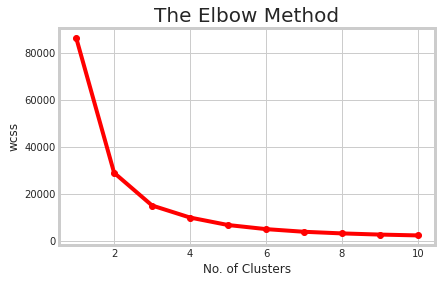

In [25]:
#elbow method
from sklearn.cluster import KMeans

# We try out different number of clusters incrementally
# From 1 till 10
# 10 was chosen as the upper limit since there doesn't seem to be many clusters present in the data
# as per the pairplot
wcss = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    km.fit(X)
    wcss.append(km.inertia_)
    
plt.plot(range(1, 11), wcss, marker='o', color='red')
plt.title('The Elbow Method', fontsize = 20)
plt.xlabel('No. of Clusters')
plt.ylabel('wcss')
plt.show()

In [26]:
km = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
km.fit(X)

# Get the cluster labels for the fitted data
labels = km.labels_
labels
df['cluster'] = labels

In [27]:
frame = pd.DataFrame(X)
frame['cluster']= km.predict(X)
frame['cluster'].value_counts()

1    1036
4    1011
0     535
3     293
2      98
Name: cluster, dtype: int64

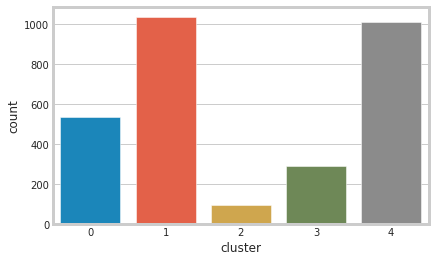

In [28]:
# Visually plotting how many points belong to each cluster 
sns.countplot(x='cluster', data=X)

#**Cluster Interpretation**

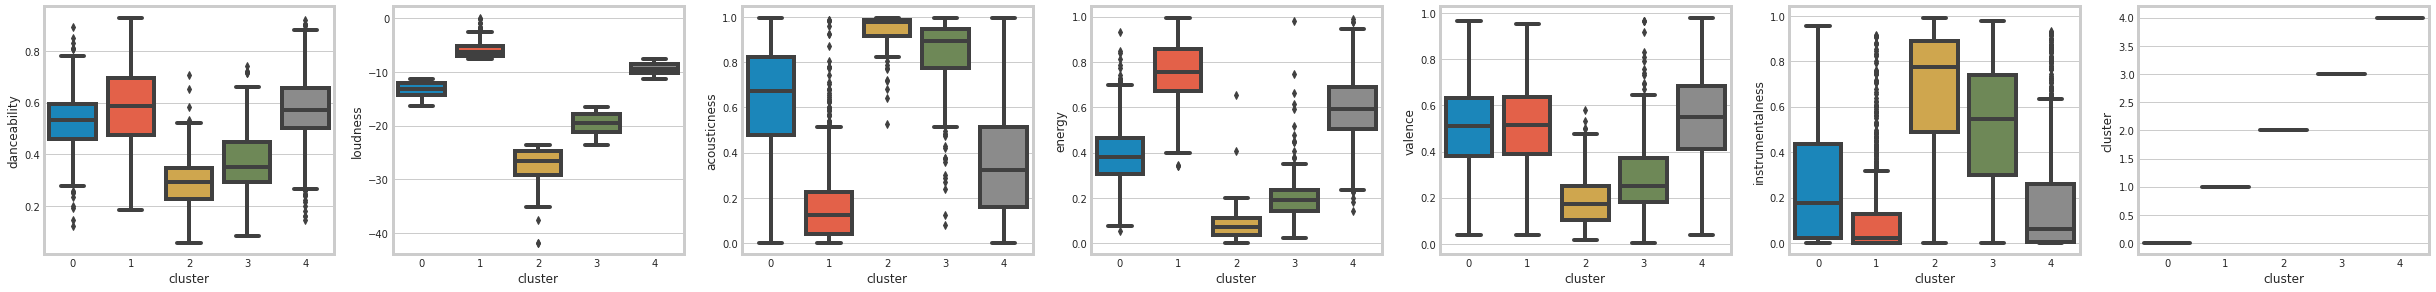

In [29]:
# Alternative code with nicer-looking plots

# selects only the numerical columns
# and calculates how the plot grid should be divided into subplots (nxn)
cols = X.select_dtypes('number')
n = int(len(cols)**(1/2))

plt.figure(figsize=(300,300))
for i, col in enumerate(cols, 1):
    plt.subplot(n+1, n, i)
    sns.boxplot(x='cluster', y=col, data=X)

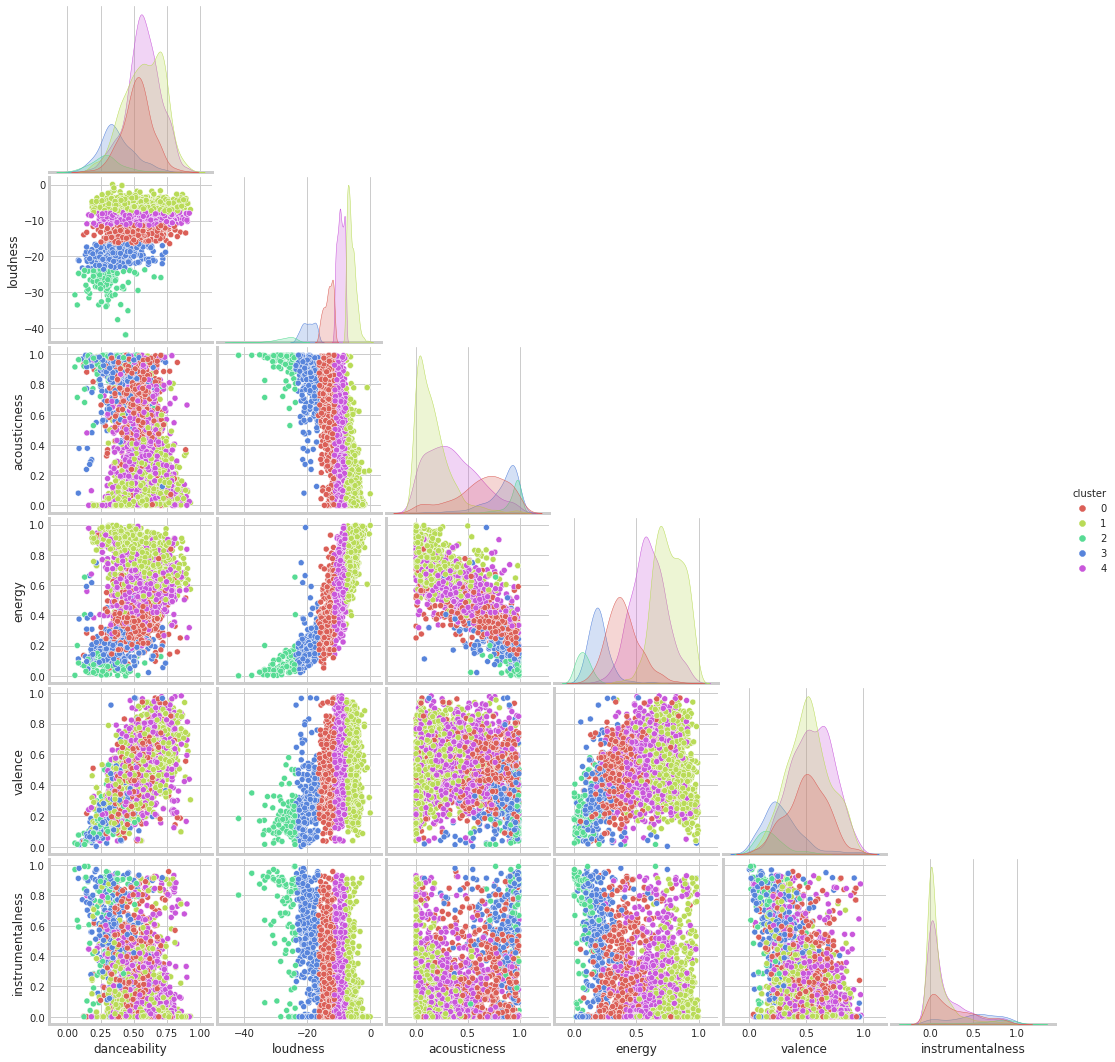

In [30]:
# pairplot
# Since there are many columns in the dataset, pairplot is hard to read
# Investigating using boxplots first and then pair/scatter plotting the interesting
# columns would be a better approach
sns.pairplot(X, hue='cluster', palette=sns.color_palette('hls', 5), corner=True)

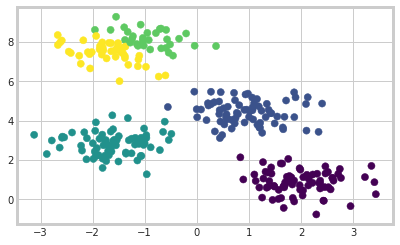

In [31]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

labels = KMeans(5, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels,
            s=50, cmap='viridis');

In [33]:
cluster_1=df[df['cluster']==0]
cluster_2=df[df['cluster']==1]
cluster_3=df[df['cluster']==2]
cluster_4=df[df['cluster']==3]
cluster_5=df[df['cluster']==4]
print(cluster_1.sample(5))
print(cluster_2.sample(5))
print(cluster_3.sample(5))
print(cluster_4.sample(5))
print(cluster_5.sample(5))

      mode             genres  acousticness  danceability  duration_ms  \
2586     1  stomp and flutter      0.861077      0.572380       207644   
584      1   classic cantopop      0.578342      0.539013       239150   
2674     1    tagalog worship      0.590075      0.363347       291714   
14       1     acoustic blues      0.761724      0.606915       204321   
2313     1           recorder      0.466000      0.619000        87960   

        energy  instrumentalness  liveness   loudness  speechiness  \
2586  0.349333          0.026157  0.135130 -11.500745     0.032075   
584   0.394944          0.006612  0.191361 -11.619264     0.033149   
2674  0.372904          0.000448  0.521637 -13.133058     0.043455   
14    0.360659          0.098918  0.183098 -12.554905     0.068815   
2313  0.342000          0.090200  0.152000 -11.429000     0.034900   

           tempo   valence  popularity  key  cluster  
2586  114.889995  0.374100   57.067308    3        0  
584   116.401759  0.3780

#**Conclusion**

Cluster 0:
Average danceability, above average loudness, above average acousticness, below average energy, average valence, below average instrumentalness 

Cluster 1:
Above average danceability, high loudness, low acousticness, high energy, average valence, low instrumentalness

Cluster 2:
below average danceability, average loudness, high acousticness, low energy,
low valence, above average instrumentalness 

Cluster 3:
below average danceability, average loudness, high acousticness, low energy, below average valence, average instrumentalness

Cluster 4:
average danceability, above average loudness, below average acousticness, above average energy, average valence, low instrrmentalness

# **Bonus**

Use your clustering model in a function that takes in a music genre as a parameter, and recommends a few similar genres to explore.


In [ ]:
# Function Call Example
# genre_recommender('jazz')
# ['hard bop', 'electric bass', 'jazz clarinet', 'cool jazz', 'bebop']